# 高校数学とJulia言語 Day 5

- 城北中学校・高等学校　中学3年・高校1年
- 夏期講習会III 2025/8/24~2025/8/28
- 担当：清水団

## 本日のテーマ：確率とシミュレーション

### 5日間の学習予定
- **Day 1**：Google Colabの紹介・基本計算 ✅
- **Day 2**：関数のグラフの描画 ✅
- **Day 3**：最適化（最大・最小） ✅
- **Day 4**：データの分析 ✅
- **Day 5**：確率・シミュレーション ← 今日

今日は確率の世界をJuliaで体験し、シミュレーションで理論を確かめてみましょう！


## 確率とシミュレーションの重要性

確率とシミュレーションは現代社会の様々な分野で活用されています：

- **天気予報**：降水確率の計算
- **保険**：事故や病気のリスク評価
- **スポーツ**：勝率の予測、戦略の最適化
- **経済**：株価の変動予測、リスク管理
- **ゲーム**：確率の計算、戦略の分析
- **医療**：薬の効果や副作用の評価

シミュレーションを使うことで、実際に何度も実験を行わなくても確率的な現象を理解できます。


## 必要なパッケージの準備

確率とシミュレーションに必要なパッケージを読み込みましょう。


In [ ]:
# パッケージのインストール（初回のみ実行）
import Pkg
Pkg.add(["Statistics", "StatsBase", "Random"])

In [1]:
# パッケージの読み込み
using Plots
using Random           # 乱数生成
using Statistics       # 統計関数
using StatsBase        # 統計分析

# フォント設定（日本語ラベルのため）
gr(fontfamily="ipam")

# 乱数のシードを設定（結果を再現可能にする）
Random.seed!(42)

println("パッケージの読み込み完了！")

パッケージの読み込み完了！


## 基本的な確率シミュレーション

### 問題1：コイン投げのシミュレーション

まずは最も基本的なコイン投げから始めてみましょう。理論的には表が出る確率は0.5ですが、実際はどうでしょうか？


In [2]:
# コイン投げの関数を定義
function coin_flip()
    return rand() < 0.5 ? "表" : "裏"
end

# 10回投げてみる
println("10回のコイン投げ：")
for i in 1:10
    result = coin_flip()
    println("$(i)回目: $(result)")
end

10回のコイン投げ：
1回目: 裏
2回目: 表
3回目: 表
4回目: 裏
5回目: 裏
6回目: 表
7回目: 裏
8回目: 裏
9回目: 表
10回目: 表


In [3]:
# 大量のコイン投げをシミュレーション
function simulate_coin_flips(n)
    heads_count = 0
    for i in 1:n
        if rand() < 0.5
            heads_count += 1
        end
    end
    return heads_count / n
end

# 異なる回数でシミュレーション
trials = [10, 100, 1000, 10000, 100000]
results = []

println("コイン投げシミュレーション結果：")
for n in trials
    prob = simulate_coin_flips(n)
    push!(results, prob)
    println("$(n)回投げて表が出る確率: $(round(prob, digits=4))")
end

println("理論値: 0.5")

コイン投げシミュレーション結果：
10回投げて表が出る確率: 0.7
100回投げて表が出る確率: 0.49
1000回投げて表が出る確率: 0.487
10000回投げて表が出る確率: 0.5026
100000回投げて表が出る確率: 0.4982
理論値: 0.5


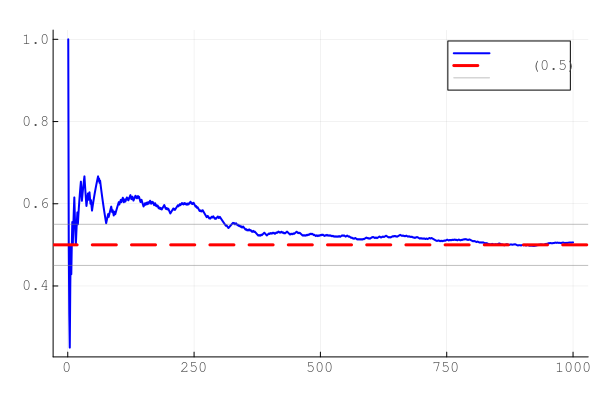

GKS: could not find font ipam.ttf
GKS: glyph missing from current font: 35430
GKS: glyph missing from current font: 34892
GKS: glyph missing from current font: 22238
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 34920
GKS: glyph missing from current font: 12364
GKS: glyph missing from current font: 20986
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 30906
GKS: glyph missing from current font: 29575
GKS: invalid bitmap size
GKS: glyph missing from current font: 12467
GKS: glyph missing from current font: 12452
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 25237
GKS: glyph missing from current font: 12370
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 30906
GKS: glyph missing from current font: 29575
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 21454
GKS: glyph missing from current font

In [4]:
# 確率の収束を可視化
n_max = 1000
cumulative_prob = []
heads_count = 0

for i in 1:n_max
    if rand() < 0.5
        heads_count += 1
    end
    push!(cumulative_prob, heads_count / i)
end

# グラフを描画
plot(1:n_max, cumulative_prob, 
     title="コイン投げの確率の収束", 
     xlabel="試行回数", 
     ylabel="表が出る確率",
     color=:blue, linewidth=2, label="シミュレーション結果")

# 理論値の線を追加
hline!([0.5], color=:red, linewidth=3, linestyle=:dash, label="理論値 (0.5)")

# 信頼区間を追加（参考）
hline!([0.45, 0.55], color=:gray, alpha=0.5, label="参考範囲")

## サイコロのシミュレーション

### 問題2：サイコロの目の分布

公正なサイコロなら、各目が出る確率は1/6 ≈ 0.167のはずです。実際にシミュレーションで確かめてみましょう。


In [5]:
# サイコロを振る関数
function roll_dice()
    return rand(1:6)
end

# 大量にサイコロを振る
n_rolls = 6000
dice_results = [roll_dice() for _ in 1:n_rolls]

# 各目の出現回数を数える
counts = [sum(dice_results .== i) for i in 1:6]
probabilities = counts ./ n_rolls

println("サイコロシミュレーション結果 ($(n_rolls)回)：")
for i in 1:6
    println("$(i)の目: $(counts[i])回 (確率: $(round(probabilities[i], digits=3)))")
end
println("理論値: 各目 1/6 ≈ 0.167")

サイコロシミュレーション結果 (6000回)：
1の目: 1019回 (確率: 0.17)
2の目: 1018回 (確率: 0.17)
3の目: 946回 (確率: 0.158)
4の目: 1012回 (確率: 0.169)
5の目: 962回 (確率: 0.16)
6の目: 1043回 (確率: 0.174)
理論値: 各目 1/6 ≈ 0.167


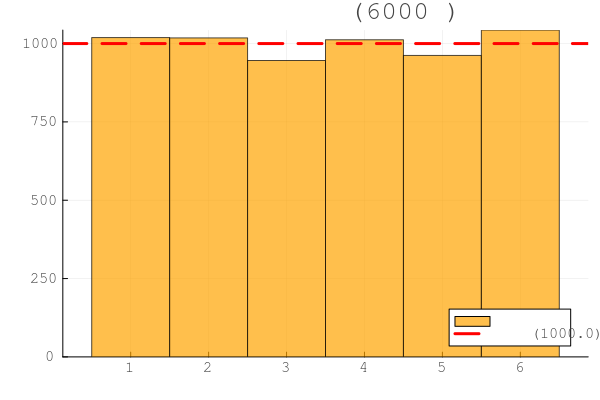

GKS: glyph missing from current font: 12469
GKS: glyph missing from current font: 12452
GKS: glyph missing from current font: 12467
GKS: glyph missing from current font: 12525
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 30446
GKS: invalid bitmap size
GKS: glyph missing from current font: 20986
GKS: glyph missing from current font: 29694
GKS: glyph missing from current font: 22238
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 12469
GKS: glyph missing from current font: 12452
GKS: glyph missing from current font: 12467
GKS: glyph missing from current font: 12525
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 30446
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 20998
GKS: glyph missing from current font: 24067
GKS: glyph missing from current font: 22238
GKS: glyph missing from current font: 12469
GKS: glyph missing from cu

In [6]:
# サイコロの結果をヒストグラムで表示
histogram(dice_results, bins=0.5:1:6.5, 
         title="サイコロの目の分布 ($(n_rolls)回)", 
         xlabel="サイコロの目", 
         ylabel="出現回数",
         color=:orange,
         alpha=0.7,
         label="シミュレーション結果")

# 理論値の線を追加
hline!([n_rolls/6], color=:red, linewidth=3, linestyle=:dash, label="理論値 ($(round(n_rolls/6)))")

### 問題3：2つのサイコロの和

2つのサイコロを振って、その和を調べてみましょう。どの数字が最も出やすいでしょうか？


In [7]:
# 2つのサイコロの和をシミュレーション
n_rolls = 10000
sums = []

for _ in 1:n_rolls
    dice1 = roll_dice()
    dice2 = roll_dice()
    push!(sums, dice1 + dice2)
end

# 理論的な確率を計算
theoretical_probs = Dict(
    2 => 1/36, 3 => 2/36, 4 => 3/36, 5 => 4/36, 6 => 5/36, 7 => 6/36,
    8 => 5/36, 9 => 4/36, 10 => 3/36, 11 => 2/36, 12 => 1/36
)

println("2つのサイコロの和の分布：")
for s in 2:12
    count = sum(sums .== s)
    simulated_prob = count / n_rolls
    theoretical_prob = theoretical_probs[s]
    println("和=$(s): 実験=$(round(simulated_prob, digits=3)), 理論=$(round(theoretical_prob, digits=3))")
end

2つのサイコロの和の分布：
和=2: 実験=0.028, 理論=0.028
和=3: 実験=0.055, 理論=0.056
和=4: 実験=0.083, 理論=0.083
和=5: 実験=0.114, 理論=0.111
和=6: 実験=0.148, 理論=0.139
和=7: 実験=0.162, 理論=0.167
和=8: 実験=0.137, 理論=0.139
和=9: 実験=0.114, 理論=0.111
和=10: 実験=0.08, 理論=0.083
和=11: 実験=0.053, 理論=0.056
和=12: 実験=0.027, 理論=0.028


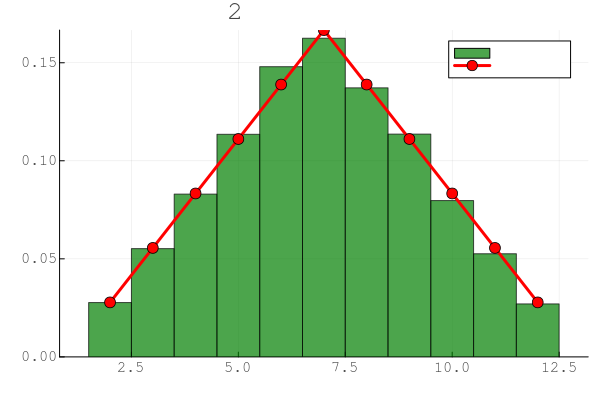

GKS: glyph missing from current font: 12469
GKS: glyph missing from current font: 12452
GKS: glyph missing from current font: 12467
GKS: glyph missing from current font: 12525
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 21644
GKS: invalid bitmap size
GKS: glyph missing from current font: 20986
GKS: glyph missing from current font: 29694
GKS: glyph missing from current font: 22238
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 12388
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 12469
GKS: glyph missing from current font: 12452
GKS: glyph missing from current font: 12467
GKS: glyph missing from current font: 12525
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 21644
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 20998
GKS: glyph missing from current font: 24067
GKS: glyph missing from cu

In [8]:
# 2つのサイコロの和のヒストグラム
histogram(sums, bins=1.5:1:12.5, 
         title="2つのサイコロの和の分布", 
         xlabel="サイコロの和", 
         ylabel="出現回数",
         color=:green,
         alpha=0.7,
         normalize=true,
         label="シミュレーション結果")

# 理論値をプロット
theoretical_x = 2:12
theoretical_y = [theoretical_probs[s] for s in theoretical_x]
plot!(theoretical_x, theoretical_y, 
      color=:red, linewidth=3, marker=:circle, markersize=6,
      label="理論値")

## 誕生日のパラドックス

### 問題4：クラスに同じ誕生日の人がいる確率

「30人のクラスで、同じ誕生日の人が2人以上いる確率は？」
直感では低そうですが、実際は驚くべき結果になります。


In [9]:
# 誕生日の重複をチェックする関数
function has_birthday_collision(n_people)
    birthdays = rand(1:365, n_people)  # 1-365の誕生日をランダムに生成
    return length(unique(birthdays)) < n_people  # 重複があればtrue
end

# 異なる人数での誕生日パラドックスをシミュレーション
function birthday_paradox_simulation(n_people, n_trials=10000)
    collisions = 0
    for _ in 1:n_trials
        if has_birthday_collision(n_people)
            collisions += 1
        end
    end
    return collisions / n_trials
end

# 様々な人数で実験
people_counts = [10, 15, 20, 23, 25, 30, 35, 40, 50]
probabilities = []

println("誕生日パラドックスのシミュレーション結果：")
for n in people_counts
    prob = birthday_paradox_simulation(n)
    push!(probabilities, prob)
    println("$(n)人: $(round(prob, digits=3))")
end

誕生日パラドックスのシミュレーション結果：
10人: 0.128
15人: 0.253
20人: 0.411
23人: 0.513
25人: 0.566
30人: 0.702
35人: 0.818
40人: 0.898
50人: 0.968


In [10]:
# 理論値の計算
function birthday_theory(n)
    if n > 365
        return 1.0
    end
    
    prob_no_collision = 1.0
    for i in 0:(n-1)
        prob_no_collision *= (365 - i) / 365
    end
    
    return 1 - prob_no_collision
end

# 理論値を計算
theoretical_probs = [birthday_theory(n) for n in people_counts]

println("\n理論値との比較：")
for i in 1:length(people_counts)
    n = people_counts[i]
    sim = probabilities[i]
    theory = theoretical_probs[i]
    println("$(n)人: シミュレーション=$(round(sim, digits=3)), 理論=$(round(theory, digits=3))")
end


理論値との比較：
10人: シミュレーション=0.128, 理論=0.117
15人: シミュレーション=0.253, 理論=0.253
20人: シミュレーション=0.411, 理論=0.411
23人: シミュレーション=0.513, 理論=0.507
25人: シミュレーション=0.566, 理論=0.569
30人: シミュレーション=0.702, 理論=0.706
35人: シミュレーション=0.818, 理論=0.814
40人: シミュレーション=0.898, 理論=0.891
50人: シミュレーション=0.968, 理論=0.97


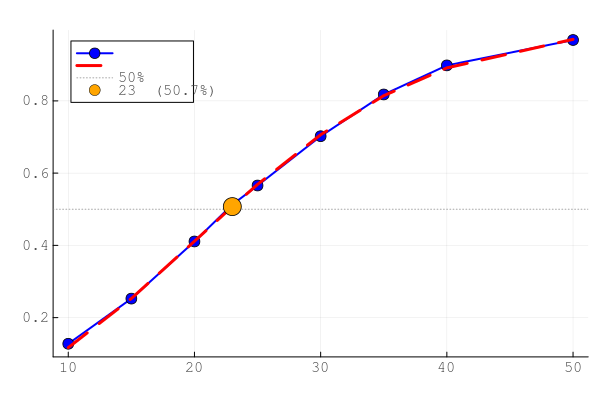

GKS: glyph missing from current font: 12463
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 20154
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 21516
GKS: glyph missing from current font: 12376
GKS: glyph missing from current font: 35477
GKS: glyph missing from current font: 29983
GKS: glyph missing from current font: 26085
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 20154
GKS: glyph missing from current font: 12364
GKS: glyph missing from current font: 12356
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 30906
GKS: glyph missing from current font: 29575
GKS: invalid bitmap size
GKS: glyph missing from current font: 35477
GKS: glyph missing from current font: 29983
GKS: glyph missing from current font: 26085
GKS: glyph missing from cu

In [11]:
# 誕生日パラドックスの可視化
plot(people_counts, probabilities, 
     marker=:circle, markersize=6, linewidth=2, color=:blue,
     title="誕生日パラドックス", 
     xlabel="クラスの人数", 
     ylabel="同じ誕生日の人がいる確率",
     label="シミュレーション結果")

plot!(people_counts, theoretical_probs, 
      linewidth=3, color=:red, linestyle=:dash,
      label="理論値")

# 50%ラインを追加
hline!([0.5], color=:gray, linestyle=:dot, alpha=0.7, label="50%ライン")

# 23人のポイントを強調
scatter!([23], [birthday_theory(23)], 
         markersize=10, color=:orange, 
         label="23人 ($(round(birthday_theory(23)*100, digits=1))%)")

## モンテカルロ法による円周率の計算

### 問題5：ランダムな点を使って円周率を求める

モンテカルロ法は、ランダムな点を使って数値を近似する手法です。円周率πを計算してみましょう。


In [12]:
# モンテカルロ法でπを計算
function estimate_pi(n_points)
    inside_circle = 0
    
    for _ in 1:n_points
        x = rand() * 2 - 1  # -1から1の範囲
        y = rand() * 2 - 1  # -1から1の範囲
        
        # 原点からの距離が1以下なら円の内部
        if x^2 + y^2 <= 1
            inside_circle += 1
        end
    end
    
    # π ≈ 4 × (円内の点の数) / (全体の点の数)
    return 4 * inside_circle / n_points
end

# 異なる点数でπを推定
point_counts = [100, 1000, 10000, 100000, 1000000]
pi_estimates = []

println("モンテカルロ法による円周率の推定：")
for n in point_counts
    pi_est = estimate_pi(n)
    push!(pi_estimates, pi_est)
    error = abs(pi_est - π)
    println("$(n)点: π ≈ $(round(pi_est, digits=4)), 誤差: $(round(error, digits=4))")
end

println("真の値: π = $(round(π, digits=6))")

モンテカルロ法による円周率の推定：
100点: π ≈ 2.84, 誤差: 0.3016
1000点: π ≈ 3.176, 誤差: 0.0344
10000点: π ≈ 3.1252, 誤差: 0.0164
100000点: π ≈ 3.1428, 誤差: 0.0012
1000000点: π ≈ 3.1412, 誤差: 0.0004
真の値: π = 3.141593


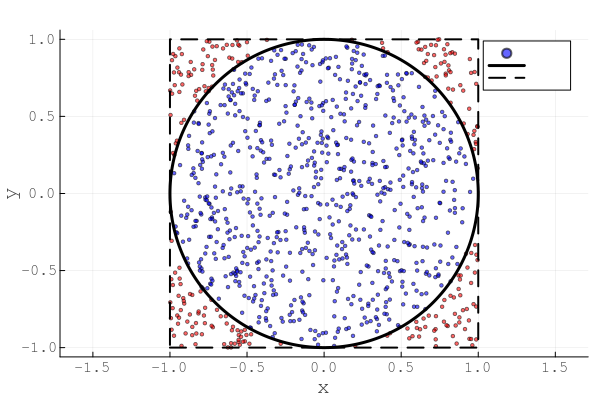

GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12486
GKS: glyph missing from current font: 12459
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12525
GKS: glyph missing from current font: 27861
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 20870
GKS: glyph missing from current font: 21608
GKS: glyph missing from current font: 29575
GKS: glyph missing from current font: 35336
GKS: glyph missing from current font: 31639
GKS: invalid bitmap size
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12480
GKS: glyph missing from current font: 12512
GKS: glyph missing from current font: 28857
GKS: invalid bitmap size
GKS: glyph missing from current font: 21336
GKS: glyph missing from cu

In [13]:
# モンテカルロ法の可視化（少数の点で）
n_points = 1000
x_points = []
y_points = []
colors = []

for _ in 1:n_points
    x = rand() * 2 - 1
    y = rand() * 2 - 1
    push!(x_points, x)
    push!(y_points, y)
    
    # 円の内部なら青、外部なら赤
    if x^2 + y^2 <= 1
        push!(colors, :blue)
    else
        push!(colors, :red)
    end
end

# 散布図をプロット
scatter(x_points, y_points, 
        color=colors, markersize=2, alpha=0.6,
        title="モンテカルロ法による円周率計算", 
        xlabel="x", ylabel="y",
        aspect_ratio=:equal,
        label="ランダム点")

# 単位円を描画
θ = 0:0.01:2π
circle_x = cos.(θ)
circle_y = sin.(θ)
plot!(circle_x, circle_y, color=:black, linewidth=3, label="単位円")

# 正方形の枠を描画
plot!([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 
      color=:black, linewidth=2, linestyle=:dash, label="正方形")

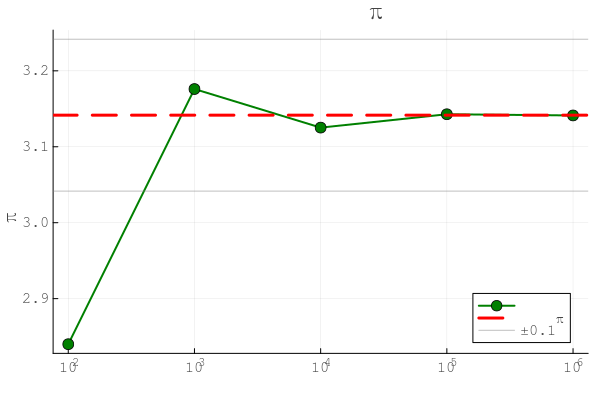

GKS: glyph missing from current font: 20351
GKS: glyph missing from current font: 29992
GKS: glyph missing from current font: 12375
GKS: glyph missing from current font: 12383
GKS: glyph missing from current font: 28857
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25968
GKS: invalid bitmap size
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25512
GKS: glyph missing from current font: 23450
GKS: glyph missing from current font: 20516
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25512
GKS: glyph missing from current font: 23450
GKS: glyph missing from current font: 20516
GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12486
GKS: glyph missing from current font: 12459
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12525
GKS: glyph missing from current font: 27861
GKS: gl

In [14]:
# πの推定値の収束を可視化
plot(point_counts, pi_estimates, 
     marker=:circle, markersize=6, linewidth=2, color=:green,
     title="モンテカルロ法によるπの収束", 
     xlabel="使用した点の数", 
     ylabel="πの推定値",
     xscale=:log10,
     label="推定値")

# 真のπの値を追加
hline!([π], color=:red, linewidth=3, linestyle=:dash, label="真の値 π")

# 信頼区間を追加
hline!([π-0.1, π+0.1], color=:gray, alpha=0.5, label="±0.1の範囲")

## Day 5 の演習問題

以下の問題に取り組んで、確率とシミュレーションの理解を深めましょう。

### 問題1: ジャンケンの確率

ジャンケンで「あいこ」になる確率をシミュレーションで求めてください。

1. ジャンケン関数を作成（グー=1, チョキ=2, パー=3）
2. 10000回のジャンケンをシミュレーション
3. あいこになる確率を計算
4. 理論値（1/3）と比較

### 問題2: 3つのサイコロの最大値

3つのサイコロを同時に振って、最大の目が6になる確率を求めてください。

1. 3つのサイコロを振るシミュレーション関数を作成
2. 最大値が6になる場合をカウント
3. ヒストグラムで最大値の分布を可視化
4. 理論値と比較（ヒント：最大値が6になるのは、少なくとも1つが6の場合）

### 問題3: 自由課題

以下のいずれかの問題を選んで解いてください：

**A. モンティ・ホール問題**
- 3つの扉のうち1つに当たりがある
- 1つ選んだ後、ホストがハズレの扉を1つ開ける
- 選択を変更する戦略と変更しない戦略の勝率を比較

**B. ランダムウォーク**
- 原点から始まって、毎ステップ±1の移動をランダムに行う
- 1000ステップ後の位置の分布を調べる
- 複数回のシミュレーションで軌跡を可視化

**C. オリジナル問題**
- 自分で面白い確率問題を考えて解く
- 例：宝くじ、スポーツの勝敗予測、ゲームの確率など


## 解答欄

以下のセルに解答を記入してください。


### 問題1の解答：ジャンケンの確率

In [16]:
# 問題1: ジャンケンの確率
# ジャンケンで「あいこ」になる確率をシミュレーションで求めてください。
# 1. ジャンケン関数を作成（グー=1, チョキ=2, パー=3）

function janken()
    rand(1:3),rand(1:3)
end

janken (generic function with 1 method)

In [17]:
# 2. 10000回のジャンケンをシミュレーション

for _=1:10^4
    janken() |> println
end

(1, 1)
(2, 1)
(3, 3)
(1, 3)
(3, 1)
(1, 1)
(1, 3)
(3, 1)
(3, 1)
(1, 3)
(1, 1)
(3, 2)
(2, 2)
(3, 1)
(2, 3)
(3, 3)
(1, 3)
(3, 2)
(1, 1)
(2, 2)
(1, 3)
(1, 1)
(3, 1)
(2, 3)
(1, 3)
(2, 1)
(2, 3)
(3, 2)
(2, 2)
(2, 1)
(2, 3)
(2, 1)
(1, 3)
(1, 1)
(2, 2)
(1, 1)
(1, 2)
(2, 2)
(1, 2)
(2, 2)
(2, 2)
(2, 1)
(3, 1)
(3, 1)
(1, 3)
(3, 1)
(1, 3)
(1, 2)
(3, 3)
(1, 2)
(2, 1)
(1, 2)
(3, 3)
(3, 1)
(3, 3)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(2, 3)
(3, 2)
(1, 2)
(2, 1)
(3, 1)
(1, 1)
(2, 1)
(1, 3)
(2, 1)
(3, 2)
(1, 3)
(1, 1)
(1, 3)
(2, 1)
(1, 1)
(2, 3)
(1, 1)
(3, 3)
(3, 3)
(2, 1)
(2, 3)
(1, 3)
(2, 1)
(3, 2)
(2, 1)
(2, 3)
(1, 1)
(2, 1)
(2, 2)
(3, 1)
(3, 3)
(2, 3)
(2, 2)
(1, 2)
(2, 1)
(2, 3)
(3, 2)
(3, 2)
(1, 3)
(2, 1)
(1, 3)
(2, 3)
(3, 1)
(3, 1)
(2, 2)
(3, 1)
(2, 1)
(3, 3)
(2, 2)
(1, 2)
(1, 2)
(2, 3)
(2, 1)
(3, 2)
(1, 2)
(2, 2)
(1, 1)
(3, 3)
(3, 3)
(2, 2)
(2, 3)
(1, 3)
(3, 2)
(1, 3)
(1, 1)
(1, 2)
(2, 3)
(1, 1)
(2, 1)
(2, 2)
(1, 1)
(2, 3)
(3, 1)
(2, 3)
(1, 3)
(3, 3)
(3, 2)
(2, 3)
(1, 1)
(2, 1)
(3, 1)
(3, 1)
(1, 1)
(2, 1)

In [20]:
# 3. あいこになる確率を計算

k , n = 0,10^7
for _ = 1:n
    p = janken()
    if p[1] == p[2]
        k += 1
    end
end
k/n

0.3333847

In [22]:
# 4. 理論値（1/3）と比較

k/n , 1/3

(0.3333847, 0.3333333333333333)

### 問題2の解答：3つのサイコロの最大値

In [24]:
# 問題2: 3つのサイコロの最大値
# 3つのサイコロを同時に振って、最大の目が6になる確率を求めてください。

# 1. 3つのサイコロを振るシミュレーション関数を作成

function saikoro()
    rand(1:6),rand(1:6),rand(1:6)
end

saikoro()

(5, 5, 2)

In [27]:
# 2. 最大値が6になる場合をカウント

k , n = 0 , 10^6
for _ = 1:n
    if saikoro() |>maximum == 6
        k += 1
    end
end
k/n

0.421257

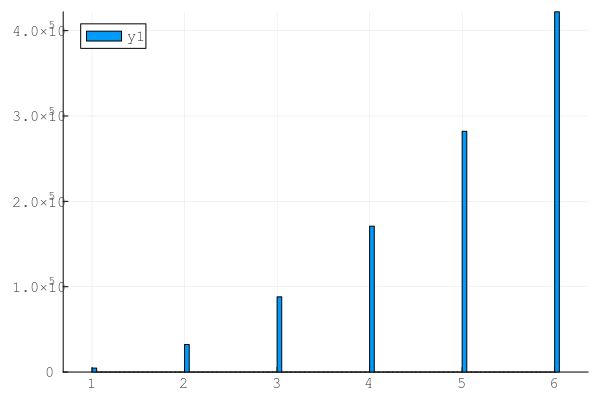

In [26]:
# 3. ヒストグラムで最大値の分布を可視化

X =[]

for _=1:10^6
    push!(X,saikoro() |> maximum)
end

histogram(X)


In [30]:
# 4. 理論値と比較（ヒント：最大値が6になるのは、少なくとも1つが6の場合）

(6^3-5^3)//(6^3),(6^3-5^3)/(6^3)

(91//216, 0.4212962962962963)

### 問題3の解答：自由課題

In [31]:
# 問題3: 自由課題
# ここに解答を書いてください

# **A. モンティ・ホール問題**
# - 3つの扉のうち1つに当たりがある
# - 1つ選んだ後、ホストがハズレの扉を1つ開ける
# - 選択を変更する戦略と変更しない戦略の勝率を比較


# モンティ・ホール問題シミュレーション
using Random
using Statistics

# 単一ゲームのシミュレーション
function monty_hall_game(switch_strategy::Bool)
    # 3つの扉（1,2,3）のうち1つに当たりを配置
    winning_door = rand(1:3)
    
    # プレイヤーが最初に選ぶ扉
    initial_choice = rand(1:3)
    
    # ホストが開ける扉を決定
    # ホストは当たりの扉と初期選択の扉以外のハズレ扉を開ける
    available_doors = setdiff(1:3, [winning_door, initial_choice])
    
    if length(available_doors) == 0
        # プレイヤーが最初に当たりを選んだ場合
        # ホストは残り2つのうちどちらかを開ける
        remaining_doors = setdiff(1:3, [initial_choice])
        host_opens = rand(remaining_doors)
    else
        # プレイヤーが最初にハズレを選んだ場合
        # ホストは利用可能なハズレ扉を開ける
        host_opens = rand(available_doors)
    end
    
    # 戦略に基づいて最終選択を決定
    if switch_strategy
        # 変更戦略：初期選択とホストが開けた扉以外を選ぶ
        final_choice = setdiff(1:3, [initial_choice, host_opens])[1]
    else
        # 変更なし戦略：初期選択のまま
        final_choice = initial_choice
    end
    
    # 勝利判定
    return final_choice == winning_door
end

# シミュレーション実行関数
function run_simulation(num_games::Int = 100000)
    println("モンティ・ホール問題シミュレーション")
    println("ゲーム数: $(num_games)")
    println("=" ^ 50)
    
    # 変更なし戦略でのシミュレーション
    stay_wins = sum([monty_hall_game(false) for _ in 1:num_games])
    stay_win_rate = stay_wins / num_games
    
    # 変更戦略でのシミュレーション
    switch_wins = sum([monty_hall_game(true) for _ in 1:num_games])
    switch_win_rate = switch_wins / num_games
    
    # 結果表示
    println("【変更なし戦略】")
    println("勝利数: $(stay_wins)")
    println("勝率: $(round(stay_win_rate * 100, digits=2))%")
    println()
    
    println("【変更戦略】")
    println("勝利数: $(switch_wins)")
    println("勝率: $(round(switch_win_rate * 100, digits=2))%")
    println()
    
    println("【理論値との比較】")
    println("変更なし戦略の理論値: 33.33%")
    println("変更戦略の理論値: 66.67%")
    println()
    
    println("【戦略比較】")
    advantage = (switch_win_rate - stay_win_rate) * 100
    println("変更戦略の優位性: +$(round(advantage, digits=2))%")
    
    return stay_win_rate, switch_win_rate
end

# 詳細なゲーム進行を表示する関数
function demonstrate_game()
    println("\n" * "=" ^ 50)
    println("ゲーム進行の詳細デモンストレーション")
    println("=" ^ 50)
    
    for game_num in 1:3
        println("\n【ゲーム $(game_num)】")
        
        # ゲーム設定
        winning_door = rand(1:3)
        initial_choice = rand(1:3)
        
        println("当たりの扉: $(winning_door)")
        println("プレイヤーの初期選択: $(initial_choice)")
        
        # ホストが開ける扉を決定
        available_doors = setdiff(1:3, [winning_door, initial_choice])
        if length(available_doors) == 0
            remaining_doors = setdiff(1:3, [initial_choice])
            host_opens = rand(remaining_doors)
        else
            host_opens = rand(available_doors)
        end
        
        println("ホストが開ける扉: $(host_opens)")
        
        # 両戦略での結果
        stay_choice = initial_choice
        switch_choice = setdiff(1:3, [initial_choice, host_opens])[1]
        
        stay_result = stay_choice == winning_door ? "勝利" : "敗北"
        switch_result = switch_choice == winning_door ? "勝利" : "敗北"
        
        println("変更なし戦略（扉$(stay_choice)）: $(stay_result)")
        println("変更戦略（扉$(switch_choice)）: $(switch_result)")
    end
end

# 統計分析を行う関数
function statistical_analysis(num_simulations::Int = 10, games_per_sim::Int = 10000)
    println("\n" * "=" ^ 50)
    println("統計分析（複数回シミュレーション）")
    println("シミュレーション回数: $(num_simulations)")
    println("各シミュレーションのゲーム数: $(games_per_sim)")
    println("=" ^ 50)
    
    stay_rates = Float64[]
    switch_rates = Float64[]
    
    for i in 1:num_simulations
        stay_wins = sum([monty_hall_game(false) for _ in 1:games_per_sim])
        switch_wins = sum([monty_hall_game(true) for _ in 1:games_per_sim])
        
        push!(stay_rates, stay_wins / games_per_sim)
        push!(switch_rates, switch_wins / games_per_sim)
        
        println("シミュレーション $(i): 変更なし=$(round(stay_rates[end]*100, digits=1))%, 変更=$(round(switch_rates[end]*100, digits=1))%")
    end
    
    println("\n【統計サマリー】")
    println("変更なし戦略:")
    println("  平均勝率: $(round(mean(stay_rates)*100, digits=2))%")
    println("  標準偏差: $(round(std(stay_rates)*100, digits=2))%")
    
    println("変更戦略:")
    println("  平均勝率: $(round(mean(switch_rates)*100, digits=2))%")
    println("  標準偏差: $(round(std(switch_rates)*100, digits=2))%")
end

# メイン実行
function main()
    # シード設定（再現可能な結果のため）
    Random.seed!(42)
    
    # メインシミュレーション実行
    stay_rate, switch_rate = run_simulation(100000)
    
    # ゲーム進行のデモンストレーション
    demonstrate_game()
    
    # 統計分析
    statistical_analysis()
    
    println("\n" * "=" ^ 50)
    println("結論:")
    println("モンティ・ホール問題では、扉を変更する戦略が")
    println("変更しない戦略の約2倍の勝率を持ちます。")
    println("これは直感に反しますが、数学的に証明可能な事実です。")
    println("=" ^ 50)
end

# 実行
main()




モンティ・ホール問題シミュレーション
ゲーム数: 100000
【変更なし戦略】
勝利数: 33460
勝率: 33.46%

【変更戦略】
勝利数: 66620
勝率: 66.62%

【理論値との比較】
変更なし戦略の理論値: 33.33%
変更戦略の理論値: 66.67%

【戦略比較】
変更戦略の優位性: +33.16%

ゲーム進行の詳細デモンストレーション

【ゲーム 1】
当たりの扉: 1
プレイヤーの初期選択: 2
ホストが開ける扉: 3
変更なし戦略（扉2）: 敗北
変更戦略（扉1）: 勝利

【ゲーム 2】
当たりの扉: 1
プレイヤーの初期選択: 1
ホストが開ける扉: 3
変更なし戦略（扉1）: 勝利
変更戦略（扉2）: 敗北

【ゲーム 3】
当たりの扉: 3
プレイヤーの初期選択: 2
ホストが開ける扉: 1
変更なし戦略（扉2）: 敗北
変更戦略（扉3）: 勝利

統計分析（複数回シミュレーション）
シミュレーション回数: 10
各シミュレーションのゲーム数: 10000
シミュレーション 1: 変更なし=33.5%, 変更=66.6%
シミュレーション 2: 変更なし=32.8%, 変更=67.0%
シミュレーション 3: 変更なし=32.8%, 変更=66.2%
シミュレーション 4: 変更なし=33.0%, 変更=67.2%
シミュレーション 5: 変更なし=33.4%, 変更=66.1%
シミュレーション 6: 変更なし=33.3%, 変更=66.9%
シミュレーション 7: 変更なし=33.7%, 変更=66.9%
シミュレーション 8: 変更なし=33.4%, 変更=66.2%
シミュレーション 9: 変更なし=33.1%, 変更=66.5%
シミュレーション 10: 変更なし=33.5%, 変更=66.8%

【統計サマリー】
変更なし戦略:
  平均勝率: 33.26%
  標準偏差: 0.29%
変更戦略:
  平均勝率: 66.63%
  標準偏差: 0.37%

結論:
モンティ・ホール問題では、扉を変更する戦略が
変更しない戦略の約2倍の勝率を持ちます。
これは直感に反しますが、数学的に証明可能な事実です。


ランダムウォークシミュレーション開始...
ステップ数: 1000
シミュレーション回数: 1000
シミュレーション完了!

=== 最終位置の統計 ===
平均: 0.92
標準偏差: 31.26
最小値: -104
最大値: 100
理論的標準偏差: 31.62
理論値との差: 0.36

軌跡をプロット中...
分散の時間変化を計算中...

プロット生成完了!

=== 原点回帰分析 ===
原点に戻る確率: 97.8%
平均最大到達距離: 38.49


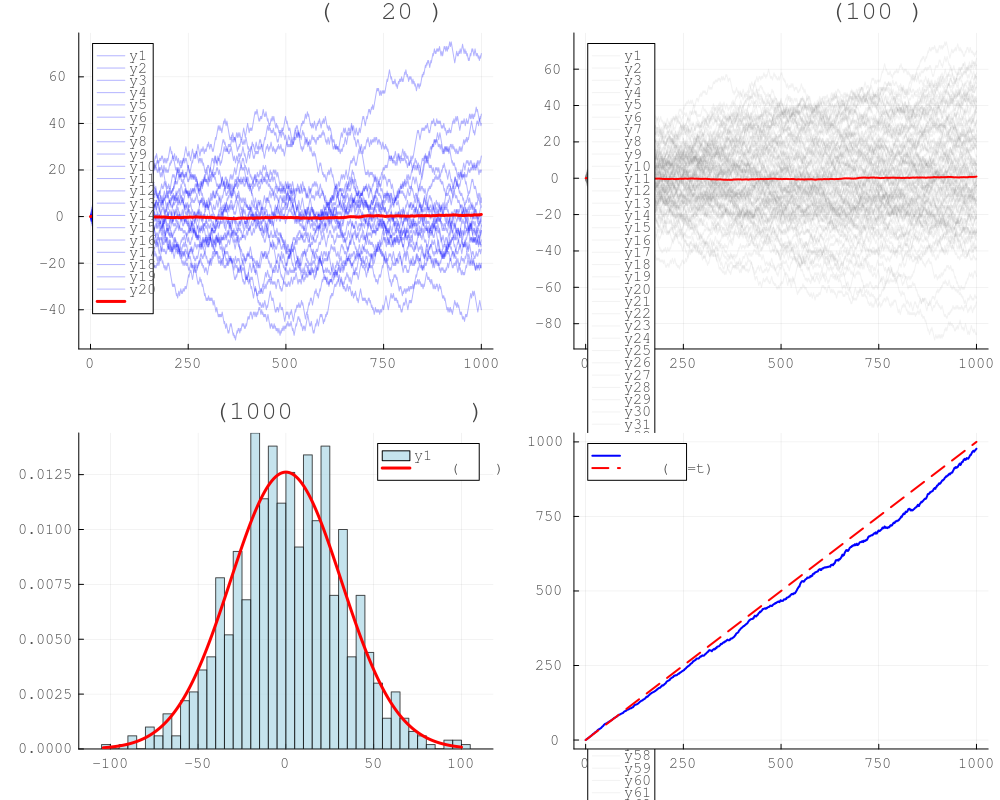

GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12486
GKS: glyph missing from current font: 12483
GKS: glyph missing from current font: 12503
GKS: invalid bitmap size
GKS: glyph missing from current font: 20301
GKS: glyph missing from current font: 32622
GKS: invalid bitmap size
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12480
GKS: glyph missing from current font: 12512
GKS: glyph missing from current font: 12454
GKS: glyph missing from current font: 12457
GKS: glyph missing from current font: 12540
GKS: glyph missing from current font: 12463
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 36556
GKS: glyph missing from current font: 36321
GKS: glyph missing from current font: 26368
GKS: glyph missing from current font: 21021
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 20491
GKS: glyph missing from cu

In [32]:

# **B. ランダムウォーク**
# - 原点から始まって、毎ステップ±1の移動をランダムに行う
# - 1000ステップ後の位置の分布を調べる
# - 複数回のシミュレーションで軌跡を可視化

using Random, Plots, Statistics

# ランダムウォークを実行する関数
function random_walk(steps::Int)
    """
    1次元ランダムウォークを実行
    steps: ステップ数
    戻り値: 各ステップでの位置の配列
    """
    positions = zeros(Int, steps + 1)  # 初期位置を含むため+1
    
    for i in 2:(steps + 1)
        # ±1をランダムに選択
        step = rand([-1, 1])
        positions[i] = positions[i-1] + step
    end
    
    return positions
end

# 複数回のランダムウォークシミュレーション
function simulate_multiple_walks(n_simulations::Int, steps::Int)
    """
    複数回のランダムウォークを実行
    n_simulations: シミュレーション回数
    steps: 各ウォークのステップ数
    戻り値: (全軌跡の配列, 最終位置の配列)
    """
    all_walks = []
    final_positions = Int[]
    
    for i in 1:n_simulations
        walk = random_walk(steps)
        push!(all_walks, walk)
        push!(final_positions, walk[end])
    end
    
    return all_walks, final_positions
end

# パラメータ設定
Random.seed!(42)  # 再現性のため
n_steps = 1000
n_simulations = 1000

println("ランダムウォークシミュレーション開始...")
println("ステップ数: $n_steps")
println("シミュレーション回数: $n_simulations")

# シミュレーション実行
all_walks, final_positions = simulate_multiple_walks(n_simulations, n_steps)

println("シミュレーション完了!")

# 統計情報の計算
mean_final = mean(final_positions)
std_final = std(final_positions)
min_final = minimum(final_positions)
max_final = maximum(final_positions)

println("\n=== 最終位置の統計 ===")
println("平均: $(round(mean_final, digits=2))")
println("標準偏差: $(round(std_final, digits=2))")
println("最小値: $min_final")
println("最大値: $max_final")

# 理論値との比較
theoretical_std = sqrt(n_steps)
println("理論的標準偏差: $(round(theoretical_std, digits=2))")
println("理論値との差: $(round(abs(std_final - theoretical_std), digits=2))")

# 可視化1: 軌跡のプロット（最初の20個）
println("\n軌跡をプロット中...")
p1 = plot(title="ランダムウォークの軌跡 (最初の20個)", 
          xlabel="ステップ", ylabel="位置",
          legend=false, alpha=0.6, linewidth=1)

for i in 1:min(20, n_simulations)
    plot!(p1, 0:n_steps, all_walks[i], color=:blue, alpha=0.3)
end

# 平均軌跡を追加
mean_walk = mean(all_walks)
plot!(p1, 0:n_steps, mean_walk, color=:red, linewidth=3, 
      label="平均", legend=:topleft)

# 可視化2: より多くの軌跡（薄く表示）
p2 = plot(title="ランダムウォークの軌跡 (100個)", 
          xlabel="ステップ", ylabel="位置",
          legend=false, alpha=0.1, linewidth=0.5)

for i in 1:min(100, n_simulations)
    plot!(p2, 0:n_steps, all_walks[i], color=:gray, alpha=0.1)
end

# 平均軌跡を追加
plot!(p2, 0:n_steps, mean_walk, color=:red, linewidth=2, 
      label="平均", legend=:topleft)

# 可視化3: 最終位置の分布
p3 = histogram(final_positions, bins=50, 
              title="最終位置の分布 ($n_simulations 回のシミュレーション)",
              xlabel="最終位置", ylabel="頻度",
              normalize=:pdf, alpha=0.7, color=:lightblue)

# 理論的な正規分布を重ね合わせ
x_range = minimum(final_positions):maximum(final_positions)
theoretical_pdf = [exp(-(x^2)/(2*n_steps)) / sqrt(2*π*n_steps) for x in x_range]
plot!(p3, x_range, theoretical_pdf, linewidth=3, color=:red, 
      label="理論値 (正規分布)")

# 可視化4: 時間経過に伴う分散の変化
println("分散の時間変化を計算中...")
variance_over_time = Float64[]

for t in 1:(n_steps+1)
    positions_at_t = [walk[t] for walk in all_walks]
    push!(variance_over_time, var(positions_at_t))
end

p4 = plot(0:n_steps, variance_over_time, 
          title="分散の時間変化", xlabel="ステップ", ylabel="分散",
          linewidth=2, color=:blue, label="実測値")

# 理論値 (分散 = t) を追加
plot!(p4, 0:n_steps, 0:n_steps, linewidth=2, color=:red, 
      linestyle=:dash, label="理論値 (分散=t)")

# 全てのプロットを表示
layout = @layout [a b; c d]
final_plot = plot(p1, p2, p3, p4, layout=layout, size=(1000, 800))

println("\nプロット生成完了!")

# 追加分析: 原点回帰の分析
println("\n=== 原点回帰分析 ===")
returns_to_origin = 0
for walk in all_walks
    if any(walk[2:end] .== 0)  # 初期位置以外で原点に戻る
        returns_to_origin += 1
    end
end

return_probability = returns_to_origin / n_simulations
println("原点に戻る確率: $(round(return_probability * 100, digits=1))%")

# 最大到達距離の分析
max_distances = [maximum(abs.(walk)) for walk in all_walks]
mean_max_distance = mean(max_distances)
println("平均最大到達距離: $(round(mean_max_distance, digits=2))")

display(final_plot)

## まとめ

5日間の「高校数学とJulia言語」講習会の最終日、お疲れさまでした！

### 今日学習した内容

#### 確率の基本
- **コイン投げ**：基本的な確率シミュレーション
- **サイコロ**：等確率事象の検証
- **確率の収束**：大数の法則の実体験

#### 応用的な確率問題
- **2つのサイコロの和**：複合事象の分析
- **誕生日パラドックス**：直感に反する確率現象
- **モンテカルロ法**：ランダムサンプリングによる数値計算

#### シミュレーションの威力
- 理論計算が困難な問題でも近似解が得られる
- 直感と理論の違いを実際に確かめられる
- 大量のデータで統計的な性質を理解できる

### 5日間の総復習

#### **Day 1**: Julia言語の基礎
- Google Colabの使い方
- 基本的な計算と数学関数
- 変数と数式の計算

#### **Day 2**: 関数とグラフ
- 関数の定義方法
- 様々な関数のグラフ描画
- 複数のグラフの比較と分析

#### **Day 3**: 最適化
- 関数の最大・最小値の数値的探索
- グラフによる視覚的理解
- 制約条件付きの最適化問題

#### **Day 4**: データ分析
- 統計量の計算（平均、分散、相関など）
- ヒストグラムと散布図による可視化
- 回帰分析と関係性の理解

#### **Day 5**: 確率とシミュレーション
- 確率現象のシミュレーション
- 理論値と実験値の比較
- モンテカルロ法による数値計算

### プログラミングの学習効果

この5日間で、皆さんは：
- **数学の理論**をプログラムで実践的に確認
- **データの可視化**で直感的な理解を深化
- **シミュレーション**で複雑な現象を分析
- **問題解決**のための新しいツールを習得

### 今後の学習に向けて

プログラミングと数学の組み合わせは、今後の学習や将来の仕事で大きな武器になります：

- **大学数学**：微積分、線形代数、統計学の理解が深まる
- **理系分野**：物理、化学、生物学での数値実験
- **文系分野**：経済学、心理学でのデータ分析
- **実社会**：AI、データサイエンス、金融工学など

### 最終メッセージ

数学は「考える力」を、プログラミングは「実現する力」を育てます。この2つを組み合わせることで、皆さんの可能性は無限に広がります。

今回学んだ技術を使って、ぜひ自分だけの面白いプロジェクトに挑戦してみてください！

### 提出について

このノートブックに解答を記入し、保存してからGoogle Classroomに提出してください。5日間の学習の集大成として、問題3では創造性溢れる解答を期待しています！

### 参考資料

- Julia Documentation: https://docs.julialang.org/
- Julia Statistics: https://docs.julialang.org/en/v1/stdlib/Statistics/
- Julia Random: https://docs.julialang.org/en/v1/stdlib/Random/
- 確率・統計の参考書
- プログラミング学習サイト

## お疲れさまでした！🎉

5日間の講習会、本当にお疲れさまでした。皆さんの今後の学習と成長を心から応援しています！
